# Preparation des données
### Initialisation du projet

In [28]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Importation

In [29]:
import os
import pandas as pd

DATASETS_PATH = os.path.join(".\datasets")

def load_datasets_data(dataset_path=DATASETS_PATH):
	csv_general = pd.read_csv(os.path.join(dataset_path, "general_data.csv"))
	csv_manager = pd.read_csv(os.path.join(dataset_path, "manager_survey_data.csv"))
	csv_employee = pd.read_csv(os.path.join(dataset_path, "employee_survey_data.csv"))
	csv_intime = pd.read_csv(os.path.join(dataset_path, "in_time.csv"))
	csv_outtime = pd.read_csv(os.path.join(dataset_path, "out_time.csv"))
	return csv_general, csv_manager, csv_employee, csv_intime, csv_outtime

In [30]:
general_set, manager_set, employee_set, intime_set, outtime_set = load_datasets_data()

In [31]:
dataset_merge = general_set.merge(employee_set.merge(manager_set, on="EmployeeID"), on="EmployeeID")
dataset = dataset_merge.copy()
pd.DataFrame.head(dataset, 5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


### Nettoyage des données / Complétion

In [32]:
#https://prod.liveshare.vsengsaas.visualstudio.com/join?6712A4B62ABC55A3AC374AFD25A834927C4D

incomplete_attributes = ["NumCompaniesWorked","JobSatisfaction","EnvironmentSatisfaction","WorkLifeBalance", "TotalWorkingYears"]

for attribute in incomplete_attributes:
	median = dataset[attribute].median()
	dataset[attribute].fillna(median, inplace=True) # option 3

#Autre methode
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [34]:
rawArray = ["Age","DistanceFromHome","Education","TotalWorkingYears",
	"TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager",
	"EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","JobInvolvement", "NumCompaniesWorked" ]

dataset_yes = dataset.where(dataset["Attrition"]=="Yes", 0)
dataset_no  = dataset.where(dataset["Attrition"]=="No", 1)

dataset_yes = dataset_yes.loc[dataset_yes["Attrition"] != 0]
dataset_no = dataset_no.loc[dataset_no["Attrition"] != 1]

print("Attrition NO: ", len(dataset_no) ," Attrition YES: ", len(dataset_yes))

print(711/4410*100)
# for col in rawArray:
#     plt.boxplot([dataset_yes[col].apply(np.int64), dataset_no[col].apply(np.int64)])
#     print(col)
#     plt.show()

# for col in rawArray:
# 	print(col)
# 	plt.hist(dataset_yes[col].apply(np.int64), color="red", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()
# 	plt.hist(dataset_no[col].apply(np.int64), color="green", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()

Attrition NO:  3699  Attrition YES:  711
16.122448979591837


In [35]:
corr_array = ["Age", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]


In [73]:
# Data frame is created under column name Name and Attrition
data_frame = pd.DataFrame(dataset, columns=["Attrition"])
 
# Data of Attrition is converted into Binary Data
df_one = pd.get_dummies(data_frame["Attrition"])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)
 
# Attritioncolumn is dropped
df_two = df_two.drop(["Attrition"], axis=1)
 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)
 
# Rename the Column
result = df_two.rename(columns={"Yes": "Attrition"})

dataset_test = dataset.copy()
attrition = result["Attrition"]

In [37]:
# dataset_test.corr()["Attrition"]

In [38]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,...,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,...,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Test Pipeline	

In [39]:
dataset_pl = dataset.copy()
ds_num = dataset_pl.select_dtypes(include=[np.number])
ds_str = dataset_pl.select_dtypes(exclude=[np.number])

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

encoder = OneHotEncoder()
encoder.fit(ds_str)
# dataset.head(10)

num_attribs = list(ds_num)
str_attribs = list(ds_str)

num_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy="median")), 
	('std_scaler', StandardScaler()),			   
])

full_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	# ("str", encoder, str_attribs),
])

dataset_pipeline = full_pipeline.fit_transform(dataset_pl)
# dataset_pipeline

In [66]:
dataset_prepared = pd.DataFrame(
    dataset_pipeline,
    columns=list(num_attribs)
)
# dataset_prepared

In [84]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
# useless_value = ['StandardHours','EmployeeCount','EmployeeID']
# dataset_prepared = dataset_prepared.drop(useless_value, axis = 1)
dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   Education                4410 non-null   float64
 3   JobLevel                 4410 non-null   float64
 4   MonthlyIncome            4410 non-null   float64
 5   NumCompaniesWorked       4410 non-null   float64
 6   PercentSalaryHike        4410 non-null   float64
 7   StockOptionLevel         4410 non-null   float64
 8   TotalWorkingYears        4410 non-null   float64
 9   TrainingTimesLastYear    4410 non-null   float64
 10  YearsAtCompany           4410 non-null   float64
 11  YearsSinceLastPromotion  4410 non-null   float64
 12  YearsWithCurrManager     4410 non-null   float64
 13  EnvironmentSatisfaction  4410 non-null   float64
 14  JobSatisfaction         

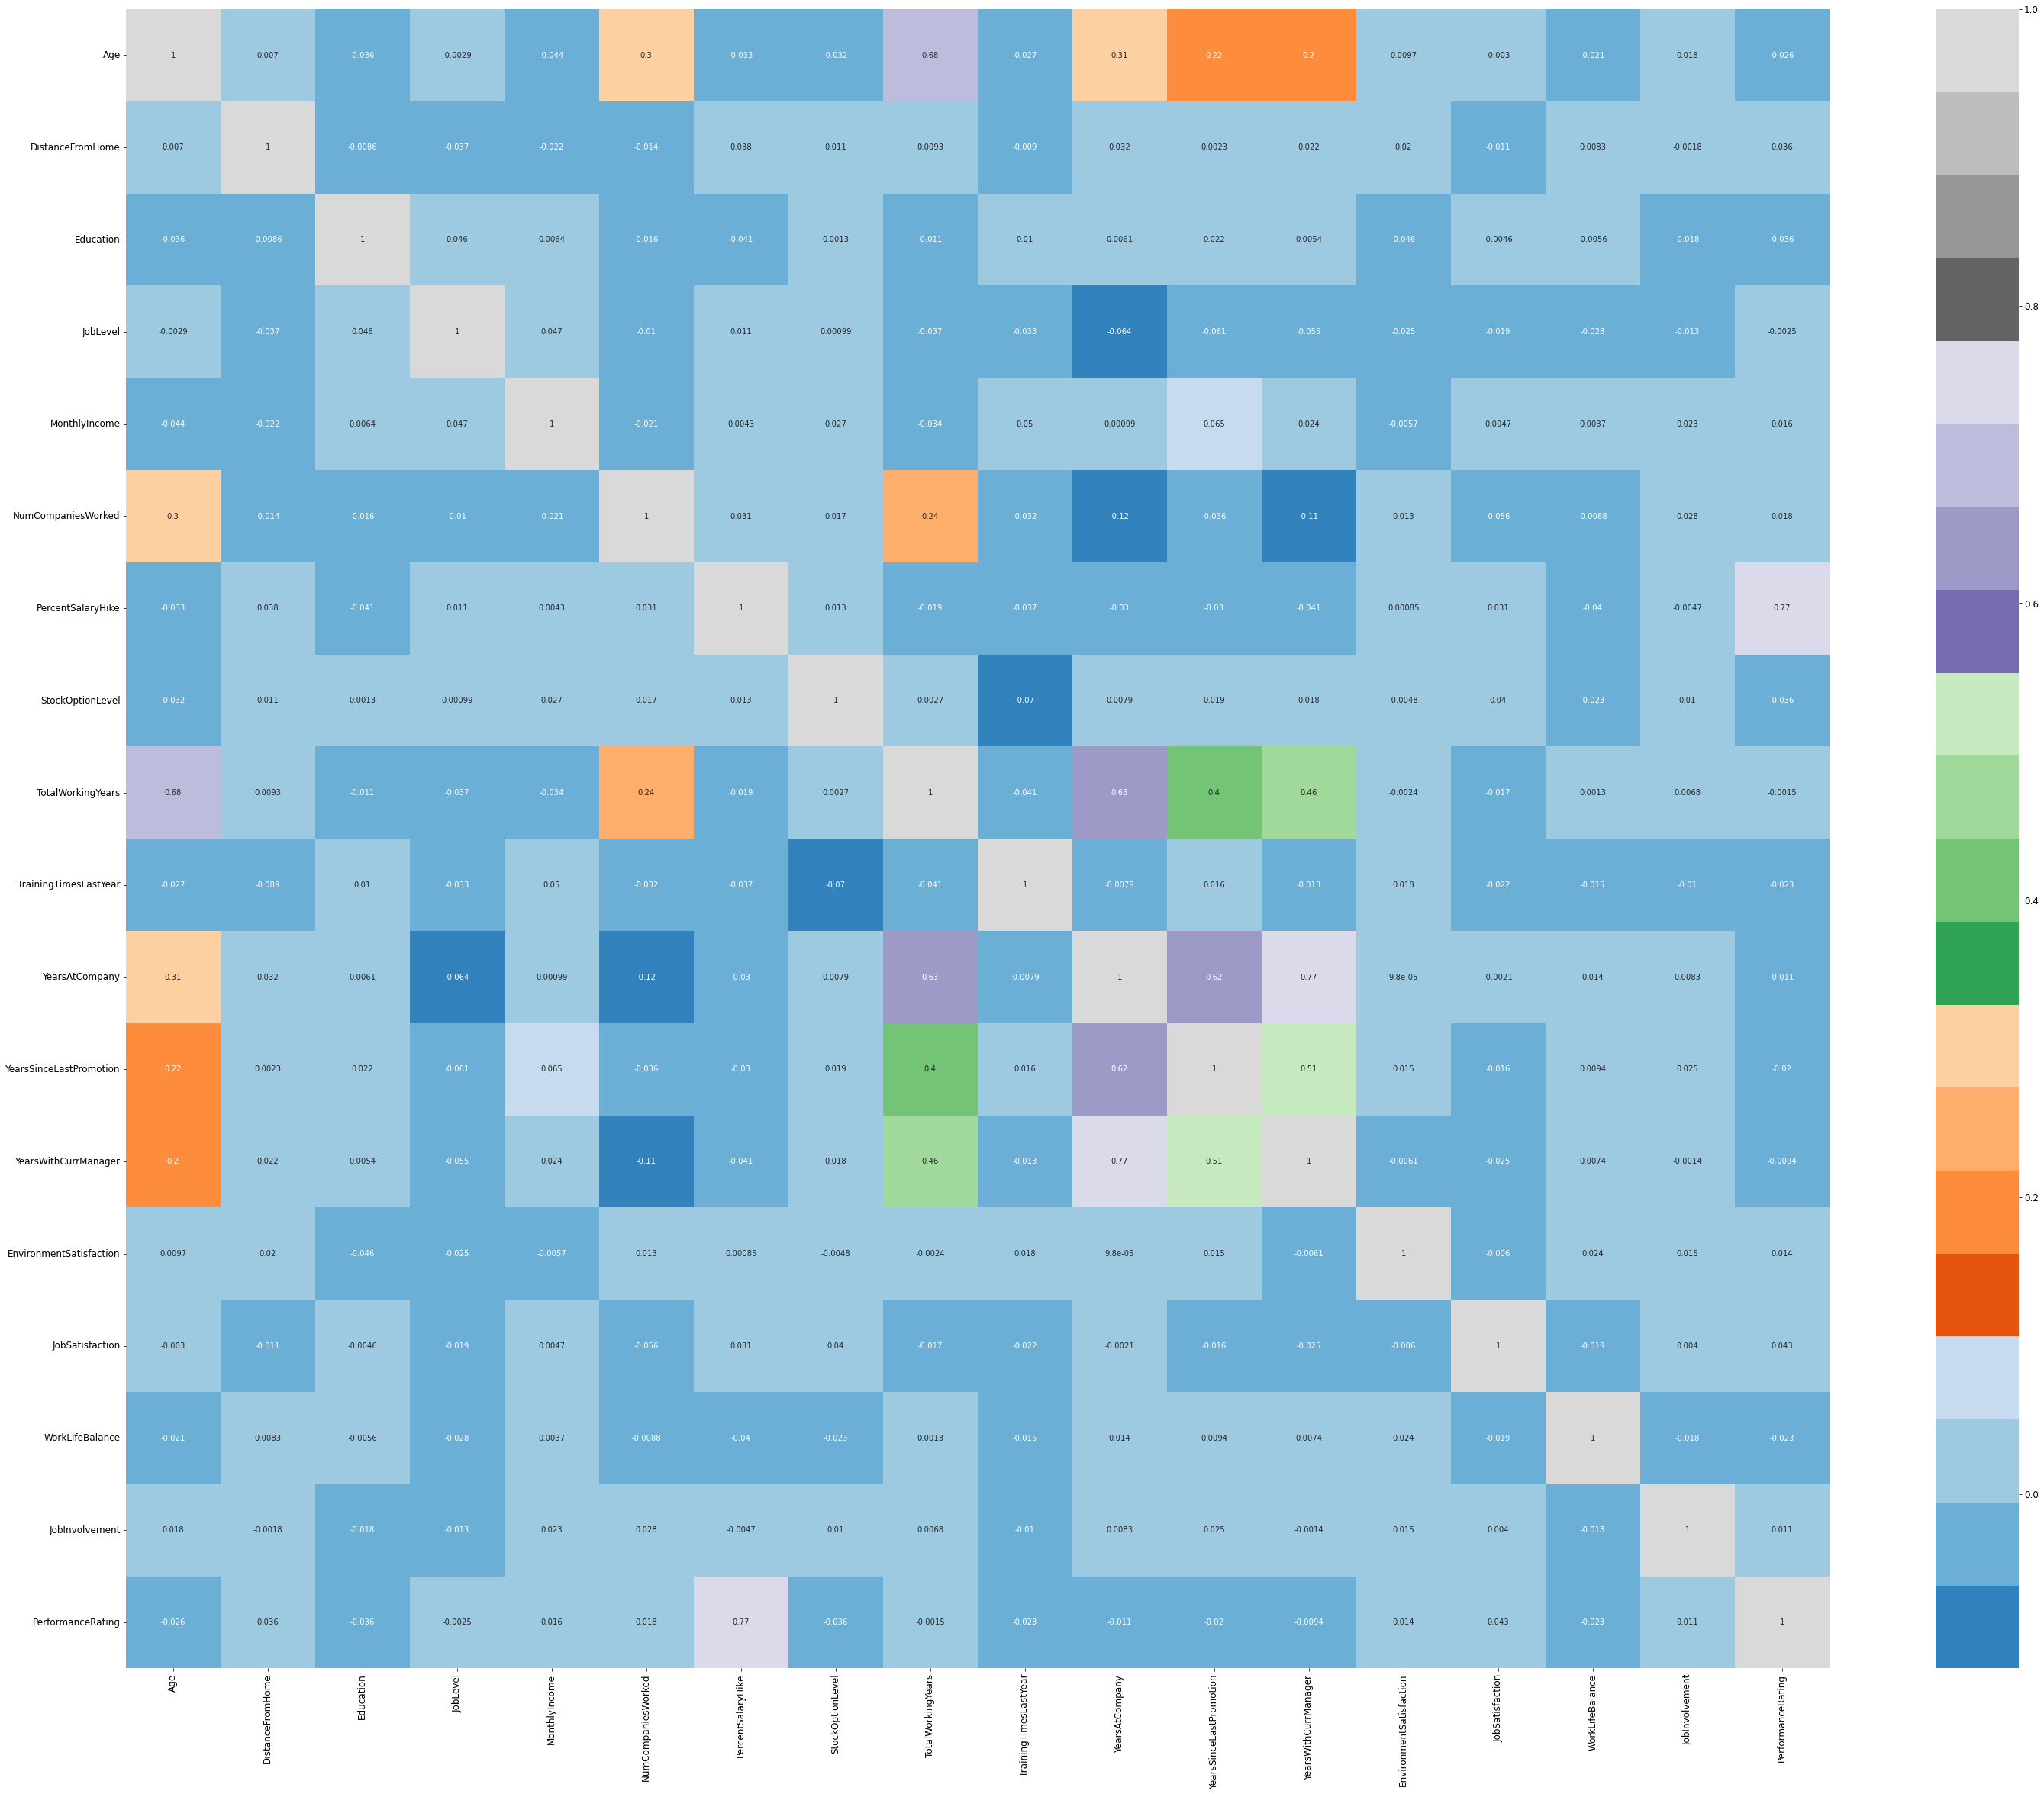

In [85]:
plt.figure(figsize = (50,40))   
sns.heatmap(dataset_prepared.corr(),annot = True,cmap="tab20c")
plt.show()

In [95]:
y = attrition
# x = dataset_prepared.drop(['Attrition'], axis = 1)
x = dataset_prepared
x

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,0.252200,1.156302,-1.085336,0.379672,-0.426230
1,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,0.252200,-0.663899,1.757749,-1.026167,2.346151
2,-0.539166,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,-0.665460,-0.663899,-2.506879,0.379672,-0.426230
3,0.117845,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,1.169861,1.156302,0.336206,-1.026167,-0.426230
4,-0.539166,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,1.169861,-1.573999,0.336206,0.379672,-0.426230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.555852,-0.517332,1.061787,-0.961486,-0.100700,0.123580,0.489376,0.241988,-0.164315,1.707500,-0.654454,-0.679146,-0.595227,1.169861,-1.573999,0.336206,0.379672,-0.426230
4406,-0.867672,-0.887515,1.061787,-0.961486,-0.812504,-0.277442,-0.057267,-0.932014,-0.164315,-0.620189,-0.654454,-0.679146,-0.595227,1.169861,1.156302,0.336206,-1.026167,-0.426230
4407,-1.305679,1.950552,-0.891688,-0.057788,-0.595138,-1.079486,1.309341,-0.932014,-0.807517,0.931603,-0.491174,-0.368715,-0.595227,-1.583120,0.246202,0.336206,0.379672,2.346151
4408,0.555852,1.086793,-0.891688,-0.961486,-0.872210,-1.079486,-0.330589,0.241988,-0.164315,-0.620189,0.325228,1.493867,1.086895,1.169861,-1.573999,0.336206,-1.026167,-0.426230


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_num, y, train_size=0.7, test_size=0.3, stratify=y)

In [97]:
X_test

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
4181,0.993860,-0.887515,0.085049,-0.961486,-0.655057,0.123580,-0.603911,1.415991,1.379369,0.155707,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2543,1.212863,-0.887515,0.085049,-0.057788,-0.049068,0.524602,-0.330589,-0.932014,2.279852,0.155707,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2566,2.088878,-1.010909,-0.891688,2.653309,-0.838001,-0.678464,1.582663,-0.932014,-0.807517,0.155707,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
750,1.869874,-1.010909,0.085049,-0.057788,-0.893671,1.326646,0.762698,1.415991,2.279852,-0.620189,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1471,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,0.336849,-0.887515,1.061787,0.845911,2.177708,-0.277442,0.762698,0.241988,-0.421596,0.155707,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1351,-0.758170,1.456975,-1.868426,-0.057788,0.835481,-1.079486,-1.150554,-0.932014,0.092965,1.707500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70,-0.429664,-0.640727,-0.891688,1.749610,-0.364386,0.123580,-1.150554,0.241988,-0.292956,-2.171982,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
808,-0.429664,-0.270544,-0.891688,-0.057788,-0.587701,2.128690,1.855984,1.415991,-0.421596,-0.620189,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8435374149659864
[[1082   28]
 [ 179   34]]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1110
           1       0.55      0.16      0.25       213

    accuracy                           0.84      1323
   macro avg       0.70      0.57      0.58      1323
weighted avg       0.81      0.84      0.81      1323



In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# on ajoute une colonne pour la constante
x_stat = sm.add_constant(x)
# on ajuste le modèle
model = sm.Logit(y, x_stat)
result = model.fit() 

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


K:\Users\Kvendev\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
K:\Users\Kvendev\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
K:\Users\Kvendev\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [101]:
result.summary()

K:\Users\Kvendev\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
K:\Users\Kvendev\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4391
Method:                           MLE   Df Model:                           18
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                     inf
Time:                        13:56:27   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9542      0.053    -37.186      0.000      -2.057      -1.851
Age                        -0.3280      0.063     -5.232      0.000      -0.451      -0.205
DistanceFromHome           -0.0345      0.044     -0.784      0.433      -0.121       0.052
Education                  -0.0725      0.043     -1.670      0.095      -0.158       0.013
JobLevel                   -0.0675      0.044     -1.518      0.129      -0.155       0.020
MonthlyIncome              -0.1200      0.045     -2.669      0.008      -0.208      -0.032
NumCompaniesWorked          0.2768      0.046      6.036      0.000       0.187       0.367
PercentSalaryHike           0.0019      0.068      0.027      0.978      -0.132       0.136
StockOptionLevel           -0.0414      0.044     -0.941      0.347      -0.128       0.045
TotalWorkingYears          -0.4947      0.094     -5.236      0.000      -0.680      -0.309
TrainingTimesLastYear      -0.1901      0.045     -4.217      0.000      -0.278      -0.102
YearsAtCompany              0.0785      0.113      0.694      0.488      -0.143       0.300
YearsSinceLastPromotion     0.4261      0.066      6.461      0.000       0.297       0.555
YearsWithCurrManager       -0.5150      0.079     -6.519      0.000      -0.670      -0.360
EnvironmentSatisfaction    -0.3181      0.043     -7.369      0.000      -0.403      -0.234
JobSatisfaction            -0.3257      0.043     -7.507      0.000      -0.411      -0.241
WorkLifeBalance            -0.1983      0.042     -4.723      0.000      -0.281      -0.116
JobInvolvement             -0.0621      0.043     -1.443      0.149      -0.147       0.022
PerformanceRating           0.0604      0.067      0.898      0.369      -0.072       0.192
===========================================================================================
"""

In [93]:
x['EducationField_Marketing']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4405    0.0
4406    0.0
4407    0.0
4408    0.0
4409    0.0
Name: EducationField_Marketing, Length: 4410, dtype: float64